<a href="https://colab.research.google.com/github/Creatrohit9/AIRBNB-PROJECT-1-CAPSTON/blob/main/MD1WK4ROHIT_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Libraries Prepration for the  Data Analysis and plot**

In [53]:

import pandas as pd
import numpy as np
import seaborn as sns
from numpy import math        #used for perform math on scalar data
from numpy import loadtxt     #fast reader for simple text files
import matplotlib.pyplot as plt
%matplotlib inline  
import matplotlib.image as mpimg      #

import warnings
warnings.filterwarnings('ignore')

In [54]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.1
pip              : 21.1.3
setuptools       : 57.2.0
Cython           : 0.29.23
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
file_path='/content/drive/MyDrive/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

# **RESEARCH **
Reagarding host-
  -Who are the top earners
  -Is there any relationship between monthly earnig and price
Regarding the Neighbourhood- 
  -Any perticular location getting maximum number of bookings
  -Price realtionwith respect to location
Regarding the reviews-
   -Relationship between Quality and price
Regarding Price-
   -privce vs amenities
   -Price vs location      

# **Data Summary**

In [57]:
#read first five row  of data 
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [58]:
#no or row and columns we are going to deal
airbnb_df.shape

(48895, 16)

In [59]:
#Name of columns we have in our data base 
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# **Descriptive Analysis**

In [60]:
#value through we are goin to deal
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-All colunms except latitude and longitude have a big gap between the third quartilevalue and the max value.
-The min value of the price is 0

In [61]:
# data information we have
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

we have 10052 missing value in column such last_review  and reviews_per_month

In [62]:
#find the maximum no of selection of room type
airbnb_df['room_type'].value_counts().idxmax()

'Entire home/apt'

In [63]:
#now these are the room type behalf on which we make further analysis 
airbnb_df_refine=airbnb_df['room_type'].value_counts()

In [64]:
airbnb_df_refine

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [65]:
airbnb_df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [66]:
airbnb_df.mean()

id                                1.901714e+07
host_id                           6.762001e+07
latitude                          4.072895e+01
longitude                        -7.395217e+01
price                             1.527207e+02
minimum_nights                    7.029962e+00
number_of_reviews                 2.327447e+01
reviews_per_month                 1.373221e+00
calculated_host_listings_count    7.143982e+00
availability_365                  1.127813e+02
dtype: float64

In [67]:
room__type_min_night=airbnb_df.groupby('room_type')['minimum_nights'].mean().reset_index()
room__type_min_night

,room_type,minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


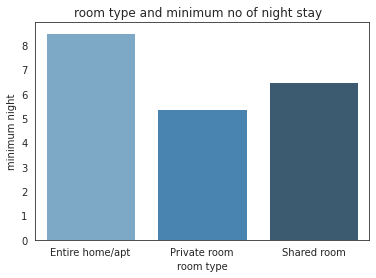

In [69]:
visual1=sns.barplot(x='room_type',y='minimum_nights',data=room__type_min_night,palette="Blues_d")
visual1.set_title('room type and minimum no of night stay  ')
visual1.set_ylabel('minimum night')
visual1.set_xlabel('room type')
visual1.set_xticks(visual1.get_xticks())


In [72]:
#finding the costly neighbourhood group for the giving room type
costly_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
costly_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Manhattan have most expensive for the all the giving room type.after google it on map we find it's situated atmid of the city so more denser and  have important financial status

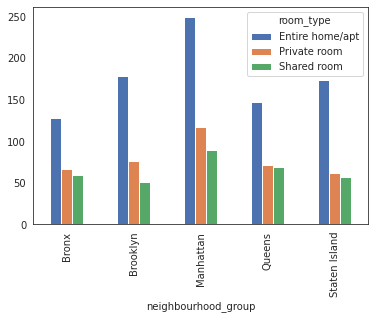

In [73]:
costly_neighbourhood_group.plot(kind='bar')

In [74]:
#ROOM TYPE IN EACH NEIGHBOURHOOD GROUP
room_type_neighbourhood_group=airbnb_df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()
room_type_neighbourhood_group

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


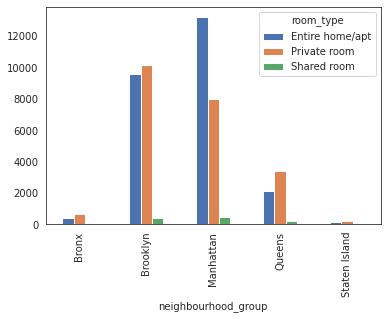

In [75]:
room_type_neighbourhood_group.plot(kind='bar')

Plot clearly says that shaed room are the least populated.that most of the people prefer privacy and safety over the less price 

In [79]:
#find the most busy neighbourhood group
most_busy_neighbour_group=airbnb_df.groupby(['neighbourhood_group'])['reviews_per_month'].mean().reset_index()
most_busy_neighbour_group

,neighbourhood_group,reviews_per_month
0,Bronx,1.837831
1,Brooklyn,1.283212
2,Manhattan,1.272131
3,Queens,1.941200
4,Staten Island,1.872580


Text(0, 0.5, 'reviews_per_month')

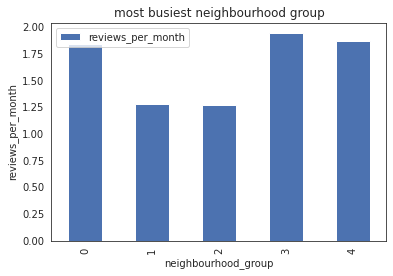

In [81]:
most_busy_neighbour_group.plot(kind='bar')
plt.title('most busiest neighbourhood group')
plt.xlabel('neighbourhood_group')
plt.ylabel('reviews_per_month')

Queens and staten island are the most busiest neighbourhood group because of  the average price

# **Cleaning the data**

In [ ]:
airbnb_df.isnull().sum()

In [ ]:
airbnb_df.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [ ]:
airbnb_df.head()

In [ ]:
airbnb_df.shape

In [ ]:
airbnb_df['reviews_per_month'].fillna({'reviews_per_month':0},inplace=True)

In [ ]:
airbnb_df.reviews_per_month.isnull().sum()   #examin change

In [ ]:
airbnb_df.shape

In [ ]:
airbnb_df.info()   

# As i see from the table their is no null value.

# **Data observation**

In [ ]:
#let's examin some intrested unique neighbourhood_group value
airbnb_df.neighbourhood_group.unique()

In [ ]:
#let's examin some intrested unique neighbourhood value
airbnb_df.neighbourhood.unique()

In [ ]:
#out of 48894 their are how much no of unique value for the respective neighbourhood
len(airbnb_df.neighbourhood.unique())

In [ ]:
#let's examin some intrested unique room_type value
airbnb_df.room_type.unique()

In [ ]:
room__type_count=airbnb_df.groupby(airbnb_df['room_type']).count().reset_index()
room__type_count

In [ ]:
room__type_count.index=room__type_count['room_type']
ploypie=room__type_count.plot.pie(y='host_id',legend=False,title='ROOM TYPES',figsize=(10,5))

In [ ]:
#calculate the most listed  host id who takes maximum benifits from this platform 
top_host=airbnb_df.host_id.value_counts().head(10)

In [ ]:
top_host

In [ ]:
# finding with already existing columns
top_host_check=airbnb_df.calculated_host_listings_count.max()

In [ ]:
top_host_check

# **let's Get start doing data visualization **

In [ ]:
#setting size of the figure for the future visualization
sns.set({'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df

In [ ]:
top_host_df.reset_index(inplace=True)
top_host_df

In [ ]:
top_host_df.rename(columns={'index':'T-host','host_id':'host_Value'},inplace=True)

In [ ]:
top_host_df

In [ ]:
visual1=sns.barplot(x='T-host',y='host_Value',data=top_host_df,palette="Blues_d")
visual1.set_title('top host with the most listed in NYC ')
visual1.set_ylabel('host counts')
visual1.set_xlabel('top host')
visual1.set_xticks(visual1.get_xticks())


In [ ]:
#insights from our neighbourhood 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx
#for Brooklyn
price_1=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Brooklyn']
price_1list=price_1[['price']]
#'Manhattan
price_2=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Manhattan']
price_2list=price_2[['price']]
#'Queens
price_3=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Queens']
price_3list=price_3[['price']]
#'Staten island
price_4=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Staten Island']
price_4list=price_4[['price']]
#Bronx
price_5=airbnb_df.loc[airbnb_df['neighbourhood_group']=='Bronx']
price_5list=price_5[['price']]
final_price_list=[price_1list,price_2list,price_3list,price_4list,price_5list]

In [ ]:
final_price_list

In [ ]:
# known values in neighbourhood_group column by using for loop
list_of_price=[]
new_list=['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

for x in final_price_list:
    a=x.describe(percentiles=[0.25, 0.50, 0.75])
    a=a.iloc[3:]
    a.reset_index(inplace=True)
    a.rename(columns={'index':'Stats'}, inplace=True)
    list_of_price.append(a)
# names of the price column to the area name for easier reading of the table       
list_of_price[0].rename(columns={'price':new_list[0]}, inplace=True)
list_of_price[1].rename(columns={'price':new_list[1]}, inplace=True)
list_of_price[2].rename(columns={'price':new_list[2]}, inplace=True)
list_of_price[3].rename(columns={'price':new_list[3]}, inplace=True)
list_of_price[4].rename(columns={'price':new_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=list_of_price
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

In [ ]:
#after seeing statistic table we can easily observ that we have some extreem value so for we need to remove it for better visualisation 
# creating a sub data frame with value less than 500
sub_data=airbnb_df[airbnb_df.price<500]
sub_data 

In [ ]:
#fining the top ten neighbourhood
airbnb_df.neighbourhood.value_counts().head(11).reset_index()

In [ ]:
#combine this data with roomtype for inrich the visualisation
sub_data2=airbnb_df.loc[airbnb_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\s kitchen','East Village','Upper East Side','Crown Heights','Midtown','East Harlem'])]
#suing catplot to represnting mutltiple atribute together
visual3=sns.catplot(x='neighbourhood',hue='neighbourhood_group',col='room_type',data=sub_data2,kind='count')
visual3.set_xticklabels(rotation=90)

**what we can see from the above 3 sub plots.we can make comparision of distribution of attributes.y-axis and x-axis are same in both the plot.in the y-axis we take count and on the x-axis we take observation we want like here neighbourhoodtheir are two more important element:column and hue.after specifying the column and determining the hue we are able to compair and observe the y-axis and x-axis among the specified column as well colour-code.so basically what we observerd the shared room type have less no of intrest.we can seen from the top 10 neighbourhood only Manhattan and Brooklyn are the most travel destination theirfore would have the most listing availability.we can also observed Bedford-stuyvesent and williamsburg are most populated from Manhattan and harlem from Brooklyn**

In [ ]:
# now take some insights from longitude and latitude
#let's draw scatter plot 
plt.figure(figsize=(10,8))
visual4 =sns.scatterplot(x="longitude", y="latitude", hue="neighbourhood_group",palette=['blue','green','yellow','grey','red'], legend='full',data=sub_data)